# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from ratelimiter import RateLimiter
from datetime import datetime
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

585

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
counter = 0
rndlat=[]
rndlon=[]

while len(rndlat) < 750:
    lat = np.random.uniform(-90, 90)
    lon = np.random.uniform(-180,180)
    rndlat.append(lat)
    rndlon.append(lon)
    counter += 1
 

geo_df = pd.DataFrame ({"lat": rndlat, "lon":rndlon})
geo_df.head()

,lat,lon
0,1.739804,158.950873
1,-88.258739,-133.617184
2,83.291441,-73.256831
3,-4.550600,15.831339
4,-79.856543,74.161775


In [4]:
city = []
country = []

for index, row in geo_df.iterrows():
    city_lat=(row["lat"])
    city_lon=(row["lon"])
    city_name = citipy.nearest_city(city_lat, city_lon).city_name
    country_code = citipy.nearest_city(city_lat, city_lon).country_code
    city.append(city_name)
    country.append(country_code)
    
city_df= pd.DataFrame ({"city": city, "country": country})
city_df.drop_duplicates(["city", "country"])
city_df.head()

,city,country
0,namatanai,pg
1,rikitea,pf
2,qaanaaq,gl
3,kinshasa,cd
4,taolanaro,mg


In [5]:
weather_data=[]

In [6]:
base_url="http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
rate_limiter = RateLimiter(max_calls=50, period=60)
sets = 0

for index, row in city_df.iterrows():
    with rate_limiter:
        city_q=row["city"]
        response = requests.get(query_url + city_q).json()
        record_counter=1
        try:
            temp=response["main"]["temp"]
            humid=response["main"]["humidity"]
            cloud=response["clouds"]["all"]
            wind=response["wind"]["speed"]
            city_lat=response["coord"]["lat"]
            city_name=response["name"]
            city_country=response["sys"]["country"]
            weather_data.append({"City": city_name, "Country": city_country, "Latitude": city_lat,
                                "Temperature (F)": temp, "Humidity (%)": humid, "Cloudiness (%)":cloud, "Wind Speed (MPH)": wind})
            print (f"Processing record {count} of Set {sets} | {city_q}")
            print (f'{base_url}appid=***masked***&units={units}&q={city_q}')
            print ("----------------------------------------------------------------")
            record_counter +=1
        except:
            print (f"Weather for {city_q} not found.")
            print ("----------------------------------------------------------------")
            continue

Processing record #1 -- namatanai
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=namatanai
----------------------------------------------------------------
Processing record #1 -- rikitea
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=rikitea
----------------------------------------------------------------
Processing record #1 -- qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=qaanaaq
----------------------------------------------------------------
Processing record #1 -- kinshasa
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=kinshasa
----------------------------------------------------------------
Weather for taolanaro not found.
----------------------------------------------------------------
Processing record #1 -- severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=severo-kurilsk
-------

Processing record #1 -- tiksi
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=tiksi
----------------------------------------------------------------
Processing record #1 -- castro
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=castro
----------------------------------------------------------------
Processing record #1 -- nome
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=nome
----------------------------------------------------------------
Processing record #1 -- puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=puerto ayora
----------------------------------------------------------------
Processing record #1 -- hofn
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hofn
----------------------------------------------------------------
Processing record #1 -- pangody
http://api.openweathermap.org/data/2

Processing record #1 -- winchester
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=winchester
----------------------------------------------------------------
Processing record #1 -- guadalupe y calvo
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=guadalupe y calvo
----------------------------------------------------------------
Processing record #1 -- asau
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=asau
----------------------------------------------------------------
Processing record #1 -- leningradskiy
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=leningradskiy
----------------------------------------------------------------
Processing record #1 -- cape town
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=cape town
----------------------------------------------------------------
Processing record #1 -- 

Processing record #1 -- hobart
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hobart
----------------------------------------------------------------
Processing record #1 -- sur
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=sur
----------------------------------------------------------------
Processing record #1 -- tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=tuktoyaktuk
----------------------------------------------------------------
Processing record #1 -- butaritari
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=butaritari
----------------------------------------------------------------
Processing record #1 -- hermanus
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hermanus
----------------------------------------------------------------
Processing record #1 -- bowen
http://api.openweatherma

Processing record #1 -- praia da vitoria
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=praia da vitoria
----------------------------------------------------------------
Processing record #1 -- mantua
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=mantua
----------------------------------------------------------------
Processing record #1 -- kavieng
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=kavieng
----------------------------------------------------------------
Processing record #1 -- kalevala
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=kalevala
----------------------------------------------------------------
Processing record #1 -- ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ushuaia
----------------------------------------------------------------
Processing record #1 -- zhigansk
http://ap

Processing record #1 -- lebu
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=lebu
----------------------------------------------------------------
Processing record #1 -- albany
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=albany
----------------------------------------------------------------
Processing record #1 -- manzhouli
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=manzhouli
----------------------------------------------------------------
Processing record #1 -- puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=puerto ayora
----------------------------------------------------------------
Processing record #1 -- shenzhen
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=shenzhen
----------------------------------------------------------------
Processing record #1 -- jamestown
http://api.openwea

Processing record #1 -- ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ushuaia
----------------------------------------------------------------
Weather for belushya guba not found.
----------------------------------------------------------------
Processing record #1 -- fethiye
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=fethiye
----------------------------------------------------------------
Processing record #1 -- tuatapere
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=tuatapere
----------------------------------------------------------------
Processing record #1 -- atuona
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=atuona
----------------------------------------------------------------
Processing record #1 -- new norfolk
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=new norfolk
-------------

Processing record #1 -- sampit
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=sampit
----------------------------------------------------------------
Processing record #1 -- butaritari
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=butaritari
----------------------------------------------------------------
Processing record #1 -- kaitangata
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=kaitangata
----------------------------------------------------------------
Processing record #1 -- cidreira
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=cidreira
----------------------------------------------------------------
Processing record #1 -- alugan
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=alugan
----------------------------------------------------------------
Processing record #1 -- mataura
http://api.openwea

Processing record #1 -- dikson
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=dikson
----------------------------------------------------------------
Processing record #1 -- atuona
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=atuona
----------------------------------------------------------------
Processing record #1 -- bethel
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=bethel
----------------------------------------------------------------
Processing record #1 -- airai
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=airai
----------------------------------------------------------------
Processing record #1 -- barrow
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=barrow
----------------------------------------------------------------
Processing record #1 -- avarua
http://api.openweathermap.org/data/2.5/we

Processing record #1 -- albany
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=albany
----------------------------------------------------------------
Processing record #1 -- camalu
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=camalu
----------------------------------------------------------------
Processing record #1 -- menongue
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=menongue
----------------------------------------------------------------
Processing record #1 -- cabo san lucas
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=cabo san lucas
----------------------------------------------------------------
Processing record #1 -- blagoyevo
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=blagoyevo
----------------------------------------------------------------
Processing record #1 -- cockburn town
http:/

Processing record #1 -- basco
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=basco
----------------------------------------------------------------
Processing record #1 -- kruisfontein
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=kruisfontein
----------------------------------------------------------------
Processing record #1 -- katsuura
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=katsuura
----------------------------------------------------------------
Processing record #1 -- cherskiy
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=cherskiy
----------------------------------------------------------------
Processing record #1 -- lebu
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=lebu
----------------------------------------------------------------
Processing record #1 -- vaini
http://api.openweathermap.

Processing record #1 -- umtata
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=umtata
----------------------------------------------------------------
Processing record #1 -- havoysund
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=havoysund
----------------------------------------------------------------
Processing record #1 -- klyuchi
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=klyuchi
----------------------------------------------------------------
Processing record #1 -- torbay
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=torbay
----------------------------------------------------------------
Processing record #1 -- bluff
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=bluff
----------------------------------------------------------------
Processing record #1 -- vuktyl
http://api.openweathermap.org/dat

Processing record #1 -- jamestown
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=jamestown
----------------------------------------------------------------
Weather for vaitupu not found.
----------------------------------------------------------------
Processing record #1 -- meulaboh
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=meulaboh
----------------------------------------------------------------
Processing record #1 -- jamestown
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=jamestown
----------------------------------------------------------------
Processing record #1 -- ponta do sol
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ponta do sol
----------------------------------------------------------------
Processing record #1 -- jamestown
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=jamestown
-----

Processing record #1 -- puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=puerto ayora
----------------------------------------------------------------
Processing record #1 -- chuy
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=chuy
----------------------------------------------------------------
Processing record #1 -- port macquarie
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=port macquarie
----------------------------------------------------------------
Processing record #1 -- albany
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=albany
----------------------------------------------------------------
Weather for taolanaro not found.
----------------------------------------------------------------
Processing record #1 -- ribeira grande
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ribeira gran

Processing record #1 -- bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=bredasdorp
----------------------------------------------------------------
Processing record #1 -- guerrero negro
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=guerrero negro
----------------------------------------------------------------
Processing record #1 -- faya
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=faya
----------------------------------------------------------------
Processing record #1 -- yellowknife
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=yellowknife
----------------------------------------------------------------
Processing record #1 -- punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=punta arenas
----------------------------------------------------------------
Processing record #1 -- ocni

Processing record #1 -- mataura
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=mataura
----------------------------------------------------------------
Processing record #1 -- keti bandar
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=keti bandar
----------------------------------------------------------------
Processing record #1 -- castro
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=castro
----------------------------------------------------------------
Processing record #1 -- bluff
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=bluff
----------------------------------------------------------------
Processing record #1 -- lahat
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=lahat
----------------------------------------------------------------
Processing record #1 -- yellowknife
http://api.openweathermap.

Processing record #1 -- lompoc
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=lompoc
----------------------------------------------------------------
Processing record #1 -- aubenas
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=aubenas
----------------------------------------------------------------
Processing record #1 -- amalapuram
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=amalapuram
----------------------------------------------------------------
Processing record #1 -- puerto escondido
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=puerto escondido
----------------------------------------------------------------
Processing record #1 -- paris
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=paris
----------------------------------------------------------------
Processing record #1 -- bluff
http://api.o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
weather_df=pd.DataFrame(weather_data)
weather_df=weather_df[["City", "Country","Latitude","Temperature (F)", "Humidity (%)", "Cloudiness (%)", "Wind Speed (MPH)"]]
weather_df.head()

,City,Country,Latitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH)
0,Namatanai,PG,-3.67,83.55,75,90,8.46
1,Rikitea,PF,-23.12,77.45,69,71,7.36
2,Qaanaaq,GL,77.48,18.70,86,100,15.77
3,Kinshasa,CD,-4.32,77.00,83,100,3.36
4,Severo-Kuril'sk,RU,50.68,33.40,92,81,17.72


In [11]:
weather_df.to_csv("weather_data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

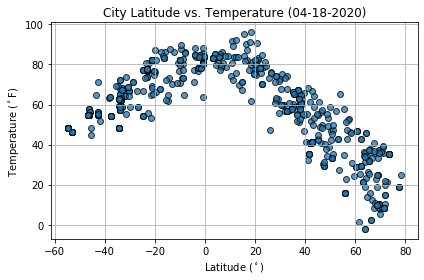

In [14]:
date = datetime.now()
date = date.strftime("%m-%d-%Y")

plt.scatter(weather_df["Latitude"], weather_df["Temperature (F)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Temperature ($^\circ$F)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("temp.png")
plt.show()


## Latitude vs. Humidity Plot

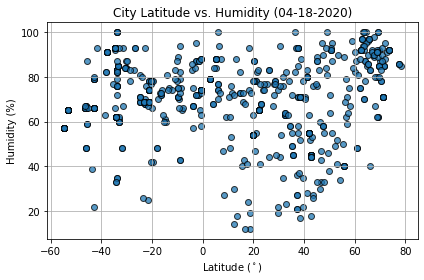

In [15]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity (%)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Humidity (%)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

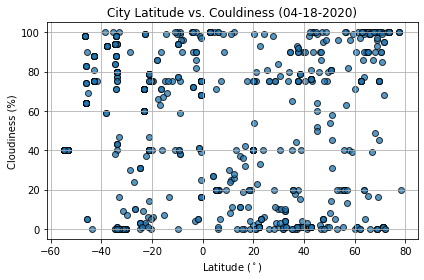

In [18]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness (%)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Couldiness ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Cloudiness (%)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

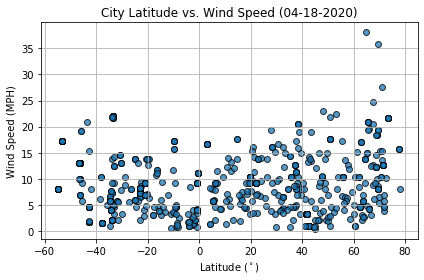

In [19]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed (MPH)"], alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("windspeed.png")
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression